In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = r"C:\Users\gangw\OneDrive\Desktop"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [3]:
#  Use to enter data directly
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing["ocean_proximity"].value_counts() 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

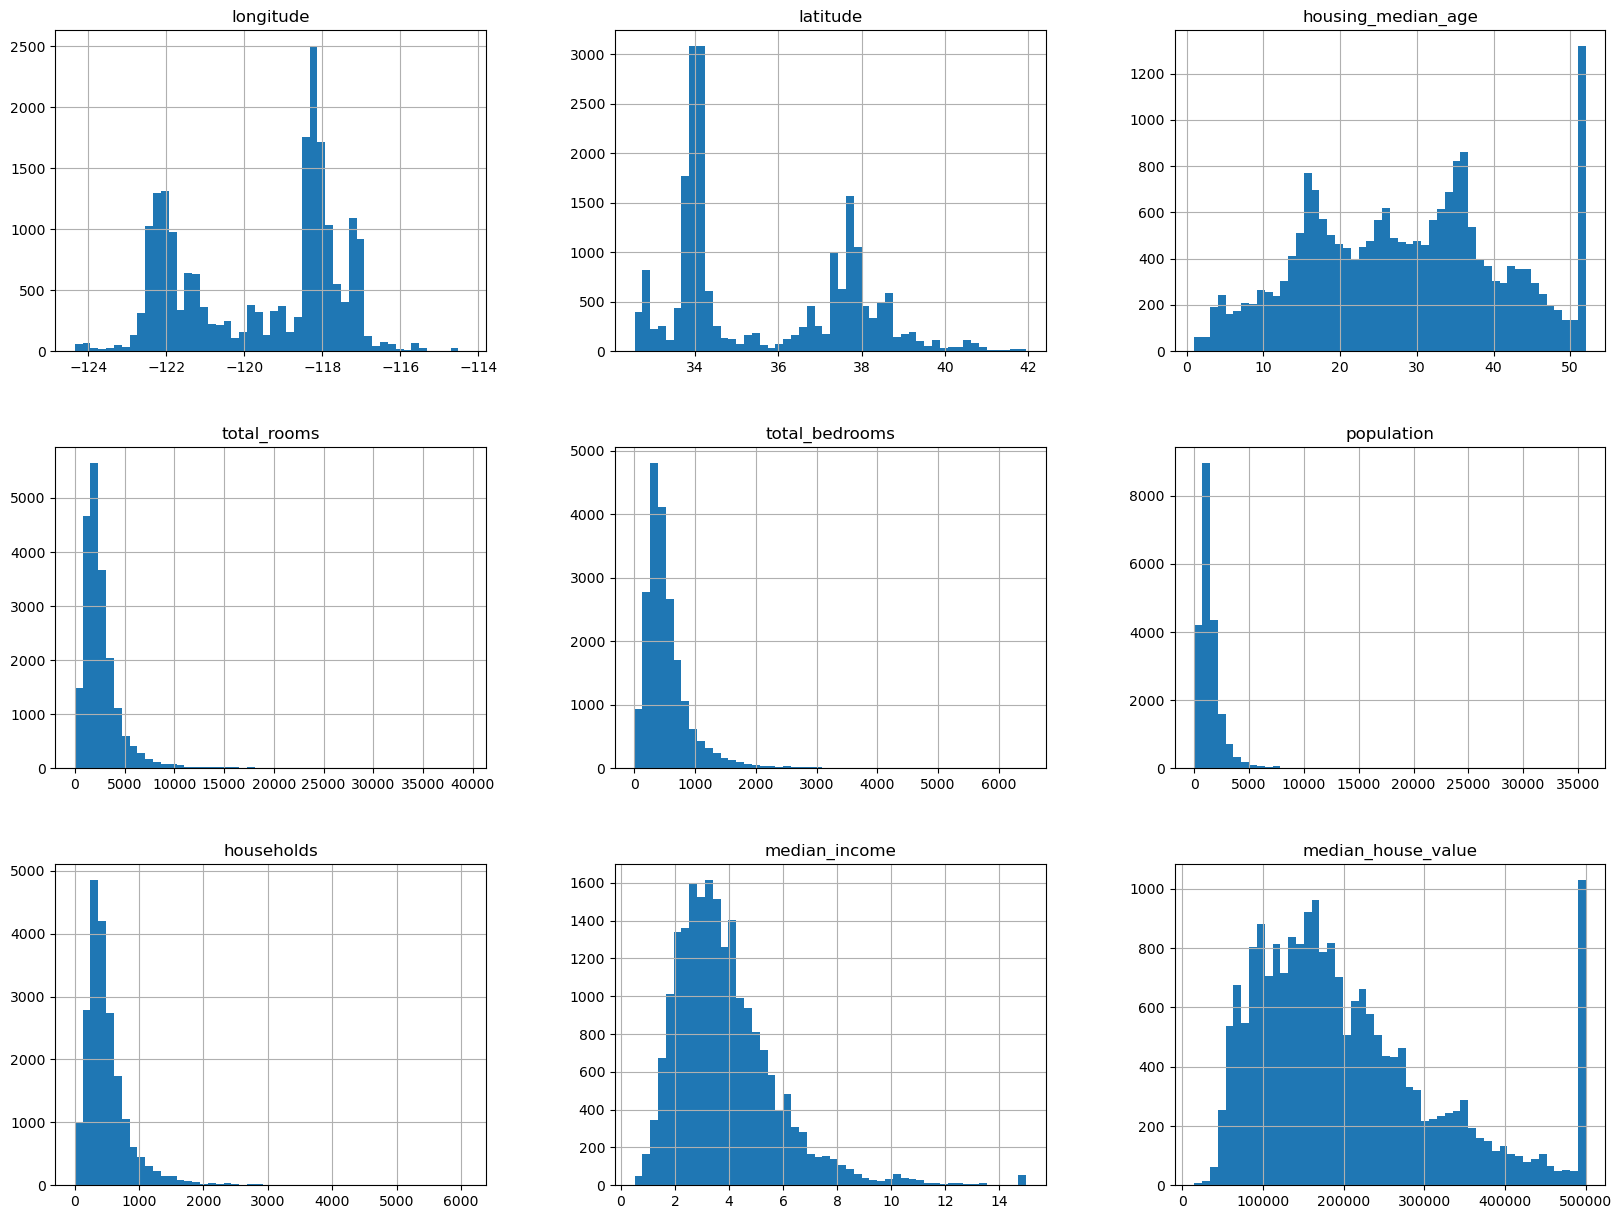

In [9]:
 %matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15)) 
plt.show()

In [10]:
import numpy as np

### Why we use np.random.seed(42) before np.random.pnc
1. It protect changing our indices again and again on each run we can also save a file to prevent randomisation of indices of the data
2. But these method also didn't work wellnext time when we restart the programme again.
3. There is another method we called each instance identifier in this method we give hash value to each instance and next time when we run it will only takes those values whose hash value ois less then or equal to 20%

## Next time when you run the train test split run from the next zection not use the below section

In [11]:
def train_test_split(data, test_ratio):
    shuffled_indices = np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_set = shuffled_indices[test_set_size : ]
    test_set = shuffled_indices[ : test_set_size]
    return data.iloc[train_set], data.iloc[test_set]

In [12]:
train_data, test_data = train_test_split(housing, 0.2)

In [13]:
len(train_data)
train_data.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [14]:
len(test_data)

4128

In [15]:
from zlib import crc32

In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xff < test_ratio * 2**32

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [18]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

## sk learn also provides a method to split train and test data
* This function is same as the above applied function train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [22]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0,1.5, 3.0, 4.5, 6, np.inf],
                              labels = [1,2,3,4,5]
                              )

<AxesSubplot:>

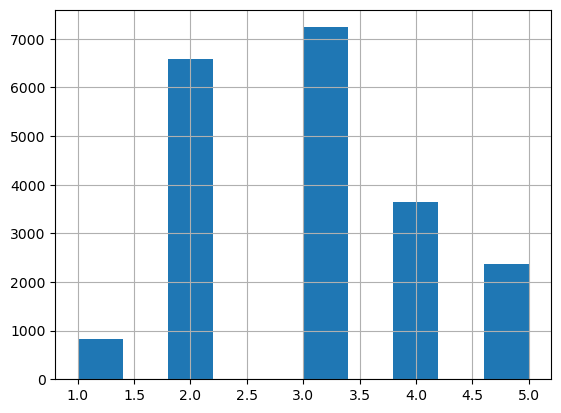

In [23]:
housing["income_cat"].hist()

### Now we do stratified random sampling on income bases

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [27]:
strat_train_set.drop(columns = ["income_cat"], inplace = True)
strat_test_set.drop(columns = ["income_cat"],  inplace = True)


In [28]:
housing = strat_train_set.copy()


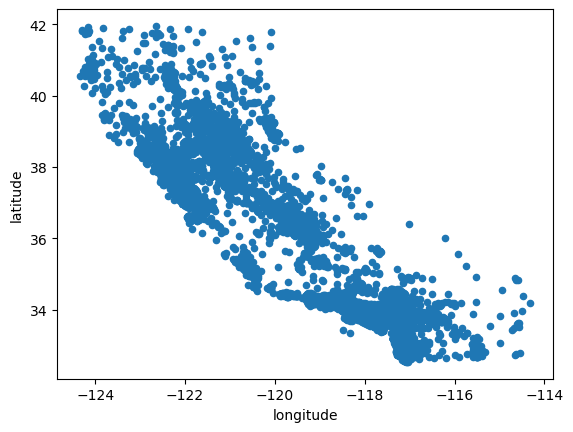

In [29]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 1) # by varying the value alpha we can control brightness of plot range(0-1)
plt.show()

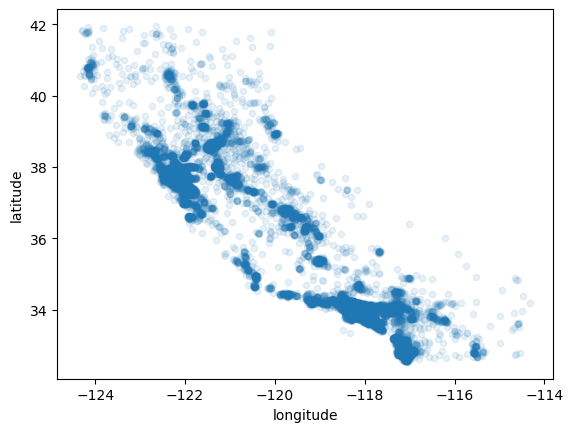

In [30]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1) 
plt.show()

# Here we can easily see the high population density places

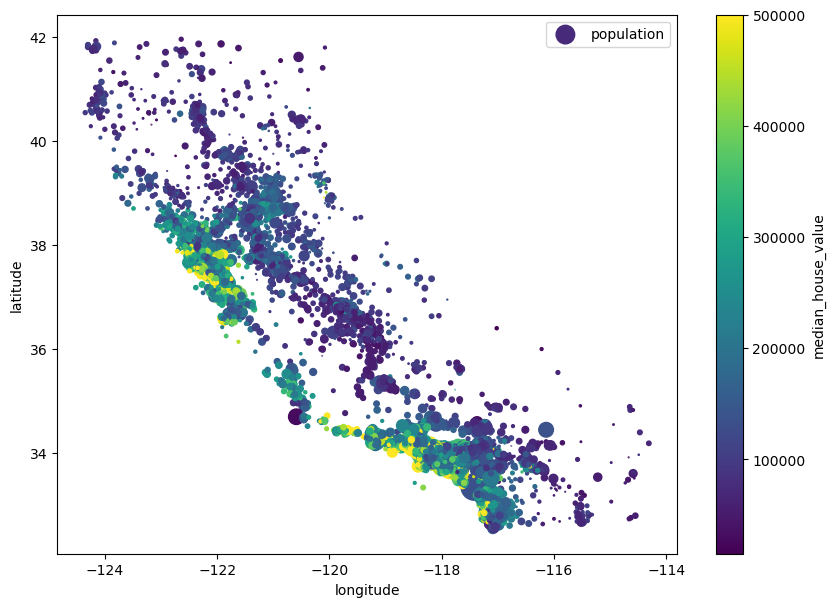

In [34]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha= 1,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", colorbar=True,
)
plt.legend()
plt.show()

In [35]:

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending  = False)

In [36]:
from pandas.plotting import scatter_matrix

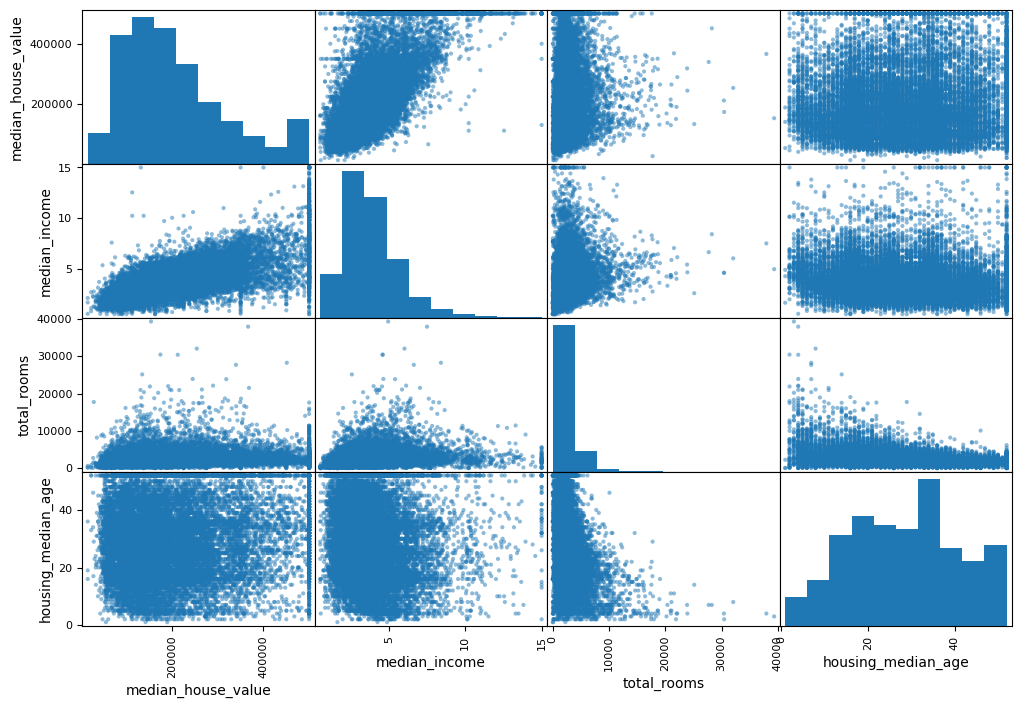

In [37]:
attributes = ["median_house_value", "median_income", "total_rooms",
                "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

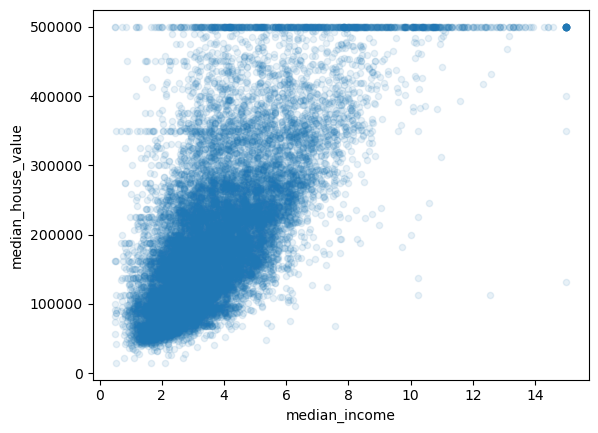

In [38]:
housing.plot(kind = "scatter", y = "median_house_value", x = "median_income", alpha = 0.1)
plt.show()

In [39]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [42]:
# Seprate predictors and copy the labels
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


# Data Cleaning
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.)

You can also use dod the third step by using sklearn inuilt simpleimputer library.

In [ ]:
# housing.dropna(subset = ['total_bedrooms'])  #option1 

# housing.drop('total_bedrooms', axis  = 1)    #option 2

# median = housing['total_bedrooms'].median()    #option3
# housing["total_bedrooms"].fillna(meadian, inplace = True)

In [70]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [51]:
X = imputer.transform(housing_num)    # replace the missing values by the learned parameters

In [54]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = housing_num.index)    # COnvert again in pandas dataframe

In [57]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [59]:
from sklearn.preprocessing import OrdinalEncoder
# ML algo prefer numbers so we convert the text to numbers( give them correspondnig id's)

In [60]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [64]:
housing_cat_1hot.toarray()  #convert sparse array to numy dense array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Custom Transfromers

In [65]:
from sklearn.base import  BaseEstimator, TransformerMixin

In [66]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [67]:
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Transformation Pipelines

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [72]:
hosuing_num_tr = num_pipeline.fit_transform(housing_num)

In [73]:
## By using Column Transformer method u can apply single transformer to hole data no need to seprate numerical and categorical data sepraely.

from sklearn.compose import ColumnTransformer

In [76]:
num_attribs = list(housing_num)
cat_attribs  = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [77]:
housing_prepared = full_pipeline.fit_transform(housing)

# Select and train a model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [81]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [82]:
from sklearn.metrics import mean_squared_error

In [84]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# not great model because huge error

68627.87390018745

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor()

In [90]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# THis looks like overfit the data

0.0

# Better using cross-validation

In [91]:
from sklearn.model_selection import cross_val_score

In [104]:
scores = cross_val_score(tree_reg,housing_prepared, housing_labels, 
                          scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [105]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard Deviation:', scores.std())

In [106]:
display_scores(tree_rmse_scores)
# not good 

Scores [73113.72778983 71159.12200633 67994.20156573 71429.76764569
 69459.97090064 77089.6830218  68846.87805623 71699.63464704
 68677.69957342 71559.31653586]
Mean 71103.00017425601
Standard Deviation: 2527.7235809270383


In [132]:
# Use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [133]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [134]:
forest_scores = cross_val_score(forest_reg,housing_prepared, housing_labels, 
                          scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_rmse_scores)
 '''Much better but still overfitting reason is score on training set is still 
    much lower than validation set'''

# Fine tune model
 To deal with overfitting and underfitting

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = [
    {'n_estimators':[1,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [146]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True, refit = True)

In [147]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [1, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [148]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [149]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [152]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

83526.67111096367 {'max_features': 2, 'n_estimators': 1}
55029.67206316478 {'max_features': 2, 'n_estimators': 10}
52927.863740615845 {'max_features': 2, 'n_estimators': 30}
77613.76281479612 {'max_features': 4, 'n_estimators': 1}
53353.98575102397 {'max_features': 4, 'n_estimators': 10}
50097.32273942046 {'max_features': 4, 'n_estimators': 30}
76544.26149986715 {'max_features': 6, 'n_estimators': 1}
52289.24308383386 {'max_features': 6, 'n_estimators': 10}
50110.62607848619 {'max_features': 6, 'n_estimators': 30}
75446.44878732445 {'max_features': 8, 'n_estimators': 1}
52209.58604651522 {'max_features': 8, 'n_estimators': 10}
49966.622974444836 {'max_features': 8, 'n_estimators': 30}
63001.840686445415 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54529.813205899736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59873.81830687173 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52391.01252787347 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [153]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.97558688e-02, 6.17627283e-02, 4.25298702e-02, 1.56190738e-02,
       1.43047537e-02, 1.55449437e-02, 1.52427996e-02, 3.41227688e-01,
       5.81422257e-02, 1.10213966e-01, 6.82228207e-02, 8.06163516e-03,
       1.72112819e-01, 7.98201464e-05, 3.75099772e-03, 3.42798977e-03])

In [154]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34122768762634265, 'median_income'),
 (0.17211281865675612, 'INLAND'),
 (0.11021396645002306, 'pop_per_hhold'),
 (0.06975586875702065, 'longitude'),
 (0.06822282065266913, 'bedrooms_per_room'),
 (0.06176272829223346, 'latitude'),
 (0.05814222573682278, 'rooms_per_hhold'),
 (0.042529870229348926, 'housing_median_age'),
 (0.015619073753774545, 'total_rooms'),
 (0.015544943741104454, 'population'),
 (0.01524279963696674, 'households'),
 (0.014304753673980493, 'total_bedrooms'),
 (0.008061635161325844, '<1H OCEAN'),
 (0.003750997719028096, 'NEAR BAY'),
 (0.003427989766203349, 'NEAR OCEAN'),
 (7.982014639975367e-05, 'ISLAND')]

# Evaluate your system on the test set

In [155]:
final_model = grid_search.best_estimator_ 

In [157]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [161]:
X_test_prepared = full_pipeline.transform(X_test)


In [162]:
final_predictions = final_model.predict(X_test_prepared)

In [163]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [167]:
from scipy import stats

In [168]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45579.95731359, 49453.50586767])

# Exercise based on chapter 2

In [169]:
#1. Use SVM

In [173]:
from sklearn.svm import SVR

In [176]:
model = SVR()
model.fit(housing_prepared, housing_labels)

SVR()

In [177]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', model.predict(some_data_prepared))

Predictions: [178735.52743945 180008.04960479 178900.87534272 178924.11179761
 179998.97535925]


In [180]:
housing_predictions = model.predict(housing_prepared)
model_mse = mean_squared_error(housing_labels, housing_predictions)
model_rmse = np.sqrt(model_mse)
model_rmse

118578.69234925653

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [187]:
param_dist = {
    'n_estimators': randint(low = 1, high = 200),
    'max_features': randint(low = 1, high = 8),
}

In [192]:
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_dist,n_iter = 10, cv = 5,
                                scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA6D199DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA52461670>},
                   random_state=42, scoring='neg_mean_squared_error')

In [193]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [194]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34122768762634265, 'median_income'),
 (0.17211281865675612, 'INLAND'),
 (0.11021396645002306, 'pop_per_hhold'),
 (0.06975586875702065, 'longitude'),
 (0.06822282065266913, 'bedrooms_per_room'),
 (0.06176272829223346, 'latitude'),
 (0.05814222573682278, 'rooms_per_hhold'),
 (0.042529870229348926, 'housing_median_age'),
 (0.015619073753774545, 'total_rooms'),
 (0.015544943741104454, 'population'),
 (0.01524279963696674, 'households'),
 (0.014304753673980493, 'total_bedrooms'),
 (0.008061635161325844, '<1H OCEAN'),
 (0.003750997719028096, 'NEAR BAY'),
 (0.003427989766203349, 'NEAR OCEAN'),
 (7.982014639975367e-05, 'ISLAND')]

In [195]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [196]:
final_rmse

47556.18651296433